Ex 1.

Slope: 1.8287671232876712
Intercept: 64.3835616438356


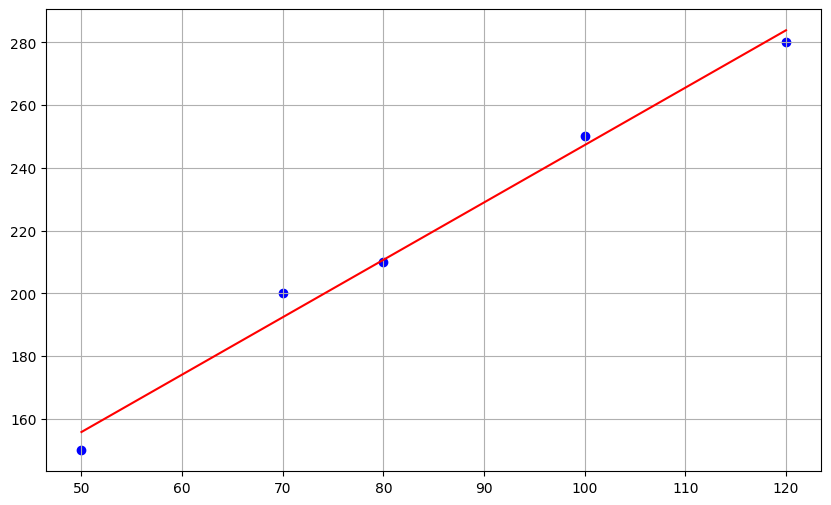

In [55]:
import numpy as np
import scipy.stats as stats

house_sizes = [50, 70, 80, 100, 120] 
house_prices = [150, 200, 210, 250, 280] 

slope, intercept, r_value, p_value, std_err = stats.linregress(house_sizes, house_prices)

print("Slope:", slope)
print("Intercept:", intercept) 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(house_sizes, house_prices, color='blue')
plt.plot(house_sizes, slope * np.array(house_sizes) + intercept, color='red')

plt.grid()
plt.show()


Ex 2.

F-value: 28.52631578947368
P-value: 2.7542672098048448e-05
Reject the null hypothesis


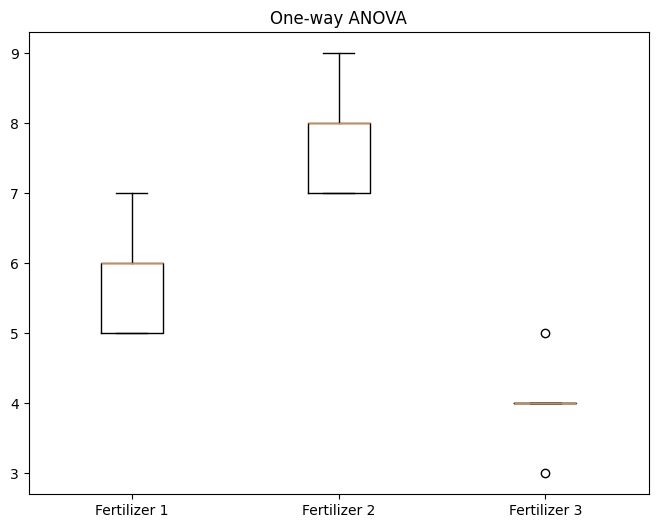

In [56]:
fertilizer_1 = [5, 6, 7, 6, 5]
fertilizer_2 = [7, 8, 7, 9, 8]
fertilizer_3 = [4, 5, 4, 3, 4]

f_value, p_value = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)
print("F-value:", f_value)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Plotting the data of a one-way ANOVA
plt.figure(figsize=(8, 6))
plt.boxplot([fertilizer_1, fertilizer_2, fertilizer_3],
            tick_labels=['Fertilizer 1', 'Fertilizer 2', 'Fertilizer 3'])

plt.title('One-way ANOVA')
plt.show()


Ex 3.

In [57]:
n, p = 10, 0.5  # number of trials, probability of each trial
binom_dist = stats.binom(n, p)
print("PMF at 5 successes:", binom_dist.pmf(5))

PMF at 5 successes: 0.24609375


Ex 4 and 5.

In [58]:
import pandas as pd

df = pd.DataFrame({
    'age': np.random.uniform(1, 60, 200).astype(int)
})
df

,age
0,45
1,57
2,51
3,1
4,28
...,...
195,16
196,59
197,18
198,49


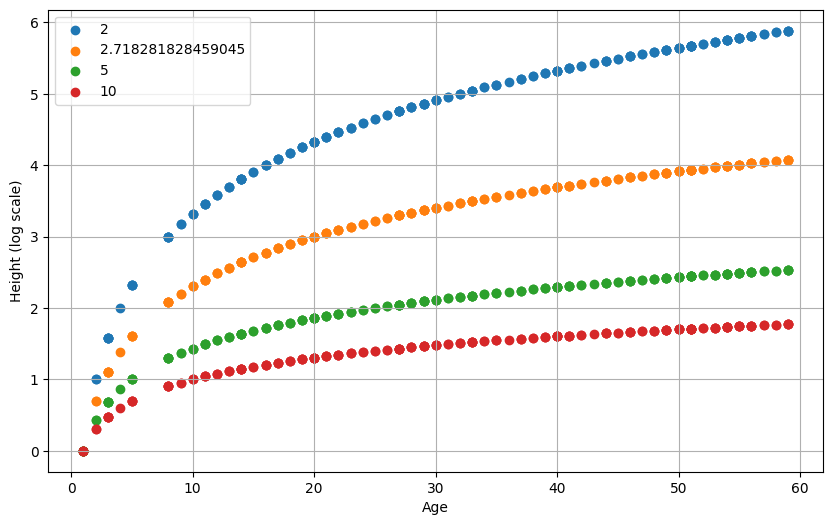

In [59]:
# Plot the log curve
plt.figure(figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Height (log scale)')
for base in [2, np.e, 5, 10]:
    plt.scatter(df['age'], np.log(df['age']) / np.log(base), label=f'{base}')
plt.legend()
plt.grid()
plt.show()


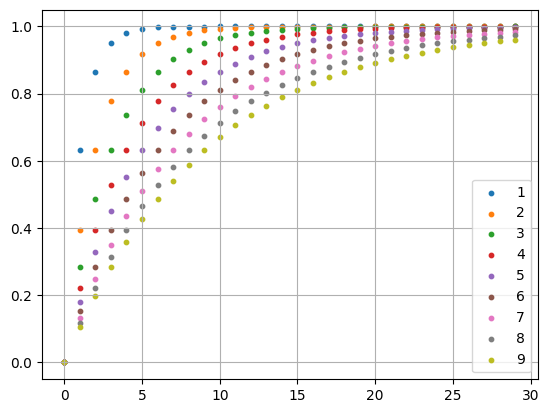

In [60]:
x = np.arange(30)

for i in range(1, 10):
    plt.scatter(x, 1 - 1 / np.exp(x / i), label=i, s=10)

plt.grid()
plt.legend()
plt.show()

In [61]:
np.random.normal(0, 1)

-0.28630196954656517

In [62]:
# Lets specify a rule that would describe change of hieght with respect to age 
# and would be close to actual relationship
# Log is good but not steep enough. By try and error i derived a suitable 
# solution: 1 - 1 / exp
def age_height(age, scale=10, avg_h=160, avg_newborn_h=50, max_var=20):
    # scale determens steepness
    height = (1 - 1 / np.exp(age / scale)) * (avg_h - avg_newborn_h) + avg_newborn_h
    var = np.random.normal(0, max_var * height / avg_h)
    return height + var

df['height'] = np.array(df['age'].apply(age_height))

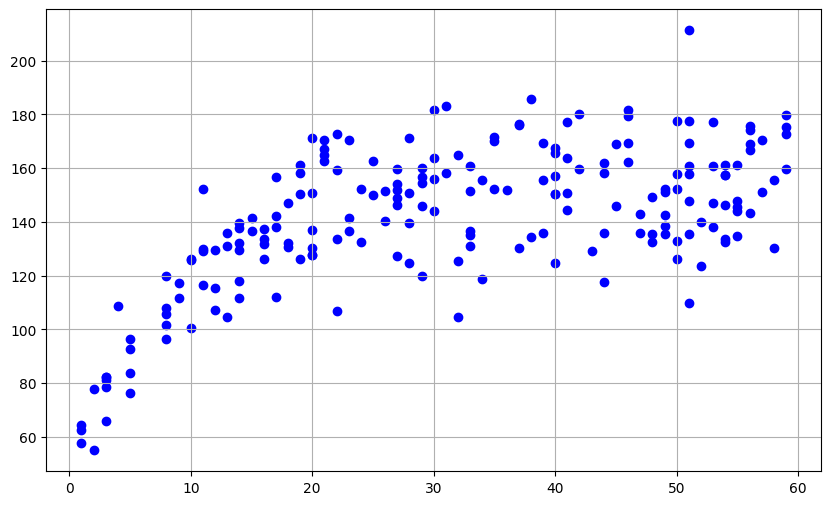

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['height'], color='blue')
plt.grid()
plt.show()


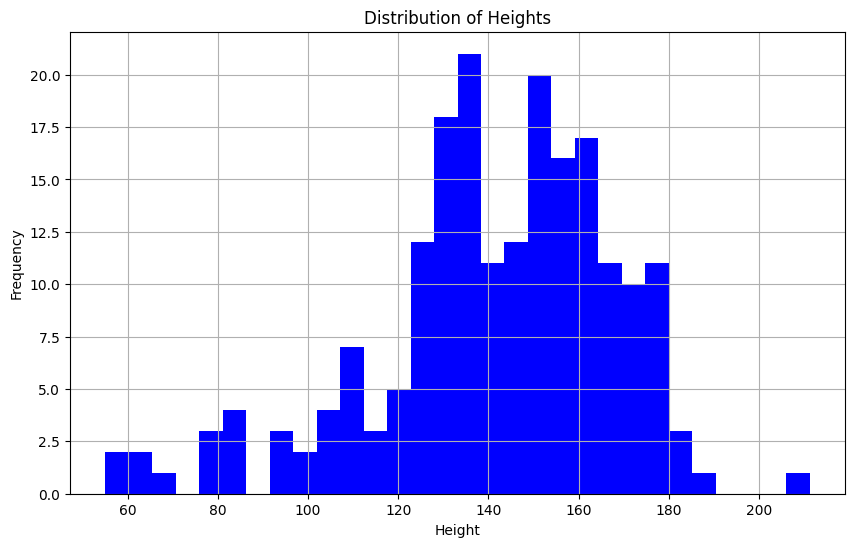

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(df['height'], bins=30, color='blue')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Heights')
plt.grid()
plt.show()




In [65]:
def show_pearson_correlation(df, x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])
    print("Slope:", slope)
    print("Pearson correlation coefficient:", r_value)
    print("P-value:", p_value)
    print("Standard error:", std_err)
    
    return slope, intercept, r_value, p_value, std_err

def show_spearman_correlation(df, x, y):
    rho, p_value = stats.spearmanr(df[x], df[y])
    print("Spearman's rank correlation coefficient:", rho)
    print("P-value:", p_value)
    return rho, p_value

Slope: 0.9815797071484614
Pearson correlation coefficient: 0.6138275421838733
P-value: 4.272628772312795e-22
Standard error: 0.08971515560398688


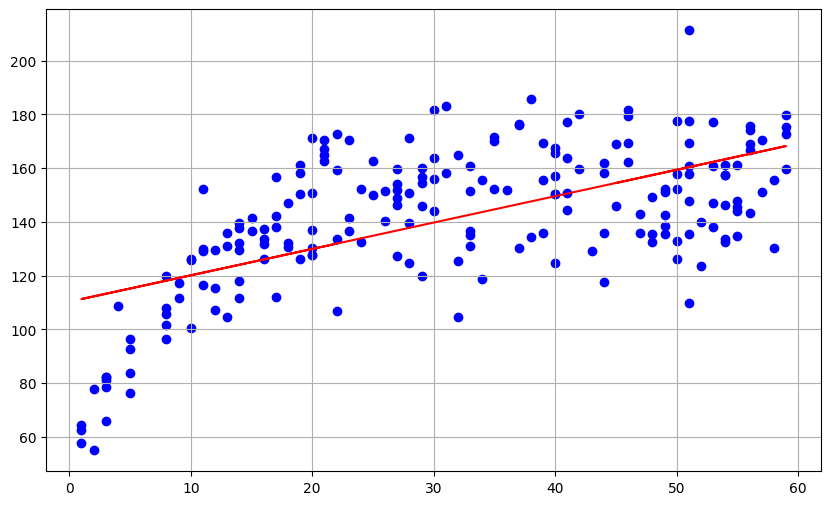

In [66]:
# Pearson cor age and height
slope, intercept, r_value, p_value, std_err = show_pearson_correlation(df, 'age', 'height')

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['height'], color='blue')
plt.plot(df['age'], slope * np.array(df['age']) + intercept, color='red')
plt.grid()
plt.show()

p-value less than 0.05 indicates that hull hypothesis of variables having no correlation (e.g. coef is 0) should be rejected. However, we know that the curve follows a nonlinear rule. So mb spearmans correlation would fit data better.

In [67]:
df.corr()

,age,height
age,1.000000,0.613828
height,0.613828,1.000000


In [68]:
# Spearman cor age and height
rho, p_value = show_spearman_correlation(df, 'age', 'height')

Spearman's rank correlation coefficient: 0.5591658308467832
P-value: 7.593752055073647e-18


🌟 It turns out that Spearman's correlation coef is less that Pearson's. Could it be the case that pearson's correlation is sesitive to outliers and overestimates the correlation? 

In [69]:
def age_income(age, scale=67, min_income=6000, max_income=50000, max_var=10000):
    income = min_income + (age / scale) * (max_income - min_income)
    var = np.random.normal(0, max_var * age / scale)
    return income + var

df['income'] = df['age'].apply(age_income)
df

,age,height,income
0,45,168.930445,45561.678686
1,57,151.039850,55321.619669
2,51,211.272592,34256.847238
3,1,62.425765,6639.135517
4,28,150.823639,24175.368498
...,...,...,...
195,16,137.472958,14862.666819
196,59,172.855401,48514.591314
197,18,130.802952,21776.149348
198,49,138.614074,33997.250739


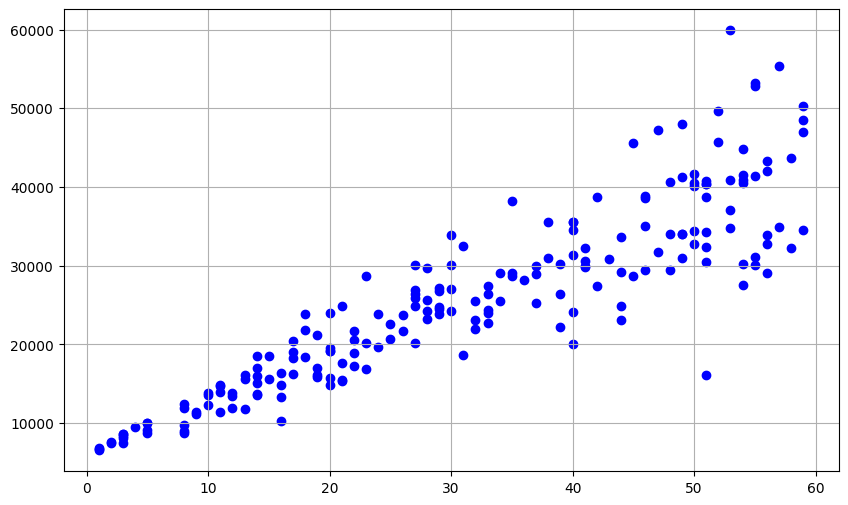

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['income'], color='blue')
plt.grid()
plt.show()



Slope: 606.4191148455542
Pearson correlation coefficient: 0.8968686576547078
P-value: 4.478874798635141e-72
Standard error: 21.253252670175975


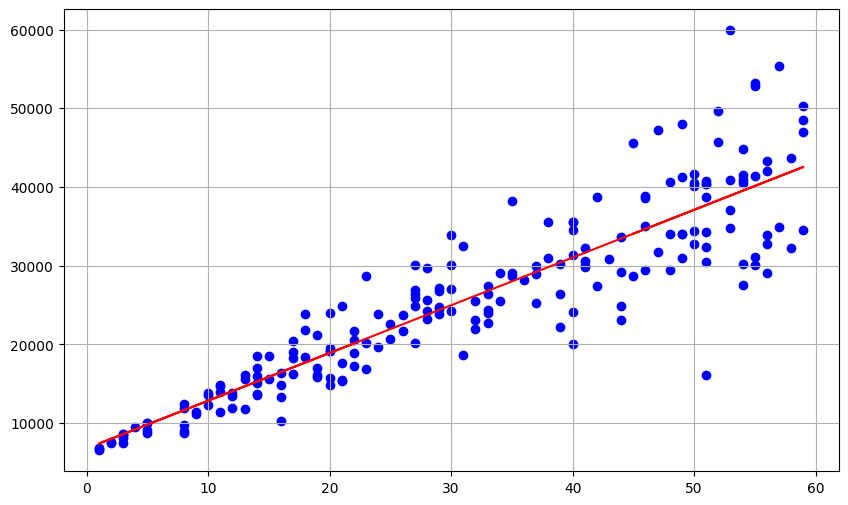

In [71]:
# Pearson cor age and height
slope, intercept, r_value, p_value, std_err = show_pearson_correlation(df, 'age', 'income')

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['income'], color='blue')
plt.plot(df['age'], slope * np.array(df['age']) + intercept, color='red')
plt.grid()
plt.show()

In [72]:
# Spearman cor age and height
rho, p_value = show_spearman_correlation(df, 'age', 'income')

Spearman's rank correlation coefficient: 0.919766924863752
P-value: 2.299212999175325e-82


Here we observe high coef for both correlations.